In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
Data_tic = pd.read_csv('/content/tested.csv')

In [3]:
Data_tic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
Data_tic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
Data_tic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
Data_tic = Data_tic.drop(['Ticket','Cabin'], axis=1)

In [ ]:
Data_tic = Data_tic.dropna()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


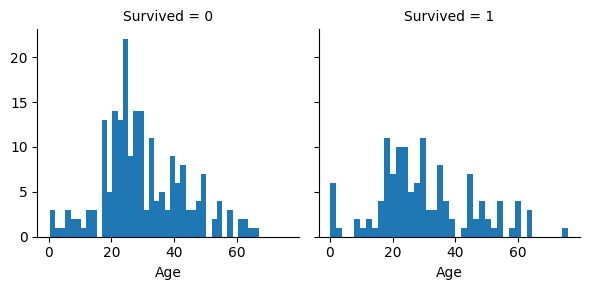

In [ ]:

gp = sns.FacetGrid(Data_tic, col='Survived')
gp.map(plt.hist, 'Age', bins=40)

In [ ]:
mean_age = Data_tic['Age'].mean()
Data_tic['Age'] = Data_tic['Age'].fillna(mean_age)
print(Data_tic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


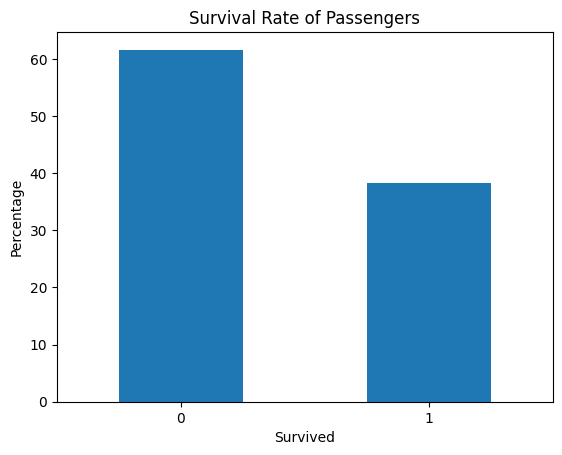

In [ ]:
survival_rate = Data_tic['Survived'].value_counts(normalize=True) * 100
survival_rate.plot(kind='bar')
plt.xlabel('Survived')
plt.ylabel('Percentage')
plt.title('Survival Rate of Passengers')
plt.xticks(rotation=0)
plt.show()

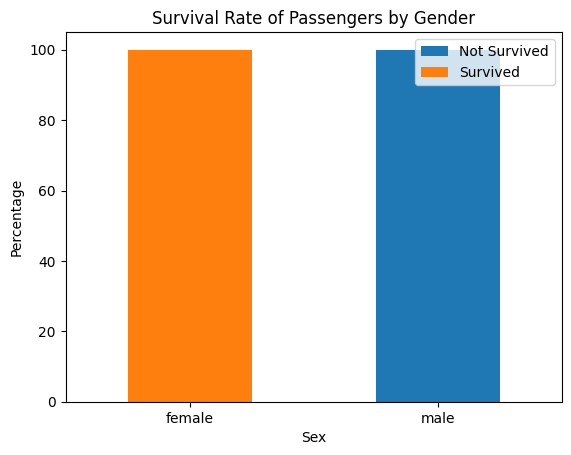

In [ ]:
gender_survival_rate = Data_tic.groupby(['Sex'])['Survived'].value_counts(normalize=True) * 100
gender_survival_rate.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Survival Rate of Passengers by Gender')
plt.xticks(rotation=0)
plt.legend(['Not Survived', 'Survived'], loc='upper right')
plt.show()

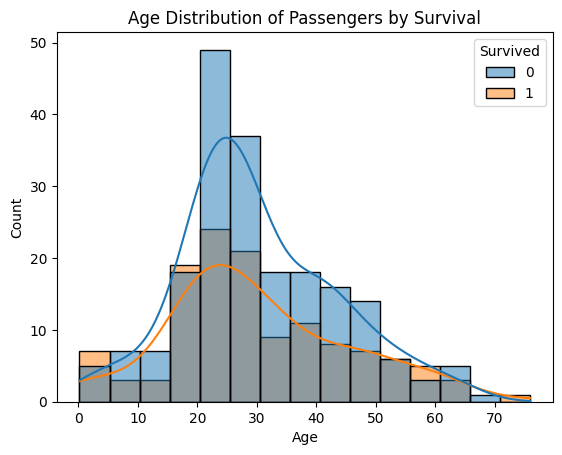

In [ ]:
import seaborn as sns
sns.histplot(data=Data_tic, x='Age', hue='Survived', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Passengers by Survival')
plt.show()

In [ ]:
Data_tic.groupby('Survived').Age.describe().unstack(level=0)


       Survived
count  0           204.000000
       1           127.000000
mean   0            30.124559
       1            30.272362
std    0            13.252910
       1            15.428613
min    0             0.330000
       1             0.170000
25%    0            21.750000
       1            20.500000
50%    0            27.000000
       1            27.000000
75%    0            39.250000
       1            38.500000
max    0            67.000000
       1            76.000000
dtype: float64

<Axes: ylabel='count'>

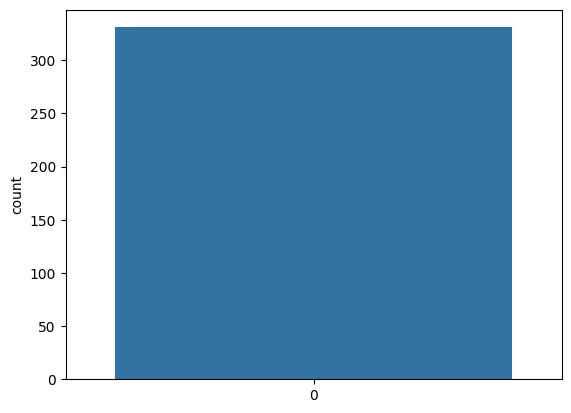

In [ ]:
sns.countplot(Data_tic['Parch'])

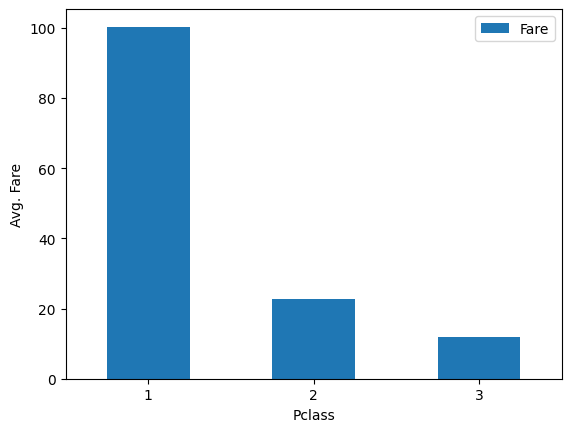

In [ ]:
class_fare = Data_tic.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()


<Axes: xlabel='Pclass', ylabel='Fare'>

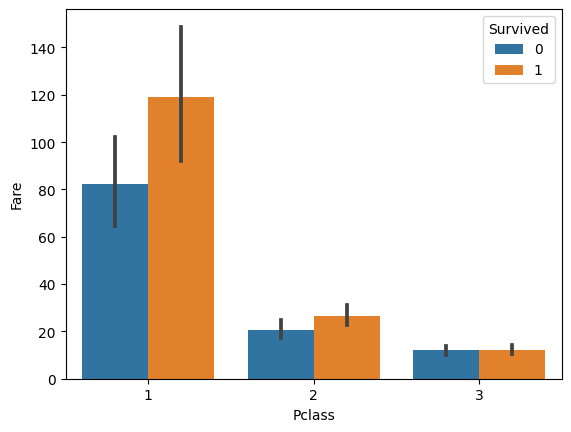

In [ ]:
sns.barplot(data=Data_tic, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

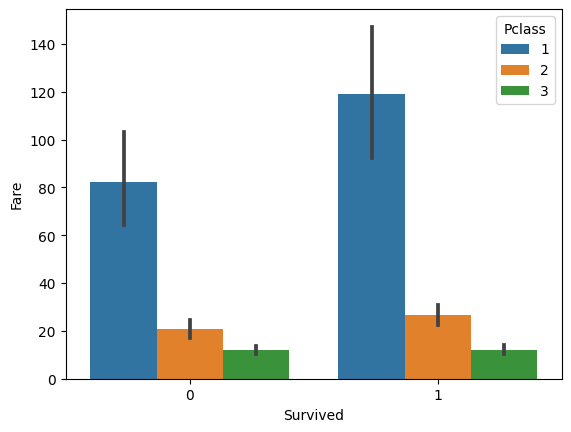

In [ ]:
sns.barplot(data=Data_tic, x='Survived', y='Fare', hue='Pclass')

<Axes: xlabel='Fare_Range', ylabel='Survived'>

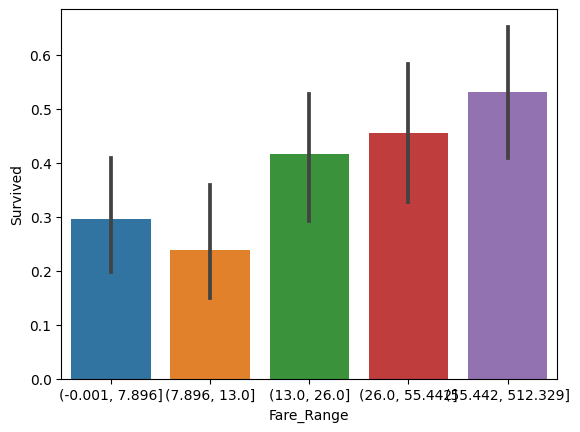

In [ ]:

Data_tic['Fare_Range'] = pd.qcut(Data_tic['Fare'], 5)
sns.barplot(x ='Fare_Range', y ='Survived',
data = Data_tic)


In [ ]:
Data_tic.Sex.value_counts()

male      204
female    127
Name: Sex, dtype: int64

In [ ]:
def sexconverter(row):
    if row['Sex'] == 'male':
        return 1
    else:
        return 0
Data_tic['Sex'] = Data_tic.apply(sexconverter, axis=1)

In [ ]:
Data_tic[Data_tic.Age < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",1,0.33,0,2,14.400,S,"(13.0, 26.0]"
250,1142,1,2,"West, Miss. Barbara J",0,0.92,1,2,27.750,S,"(26.0, 55.442]"
281,1173,0,3,"Peacock, Master. Alfred Edward",1,0.75,1,1,13.775,S,"(13.0, 26.0]"
307,1199,0,3,"Aks, Master. Philip Frank",1,0.83,0,1,9.350,S,"(7.896, 13.0]"
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0,0.17,1,2,20.575,S,"(13.0, 26.0]"


In [ ]:
tmp = pd.crosstab(index=Data_tic.Sex, columns=Data_tic.Survived, margins=True)
tmp

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Survived,0,1,All
Sex,,,
0,0,127,127
1,204,0,204
All,204,127,331


In [ ]:

Data_tic.count()


PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [ ]:
Data_tic.groupby('Survived').mean()

<ipython-input-64-45d6a8502c69>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Data_tic.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272732,0.379699,0.274436,27.527877
1,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699


In [ ]:
fig = plt.figure(figsize=(6,6))
Data_tic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


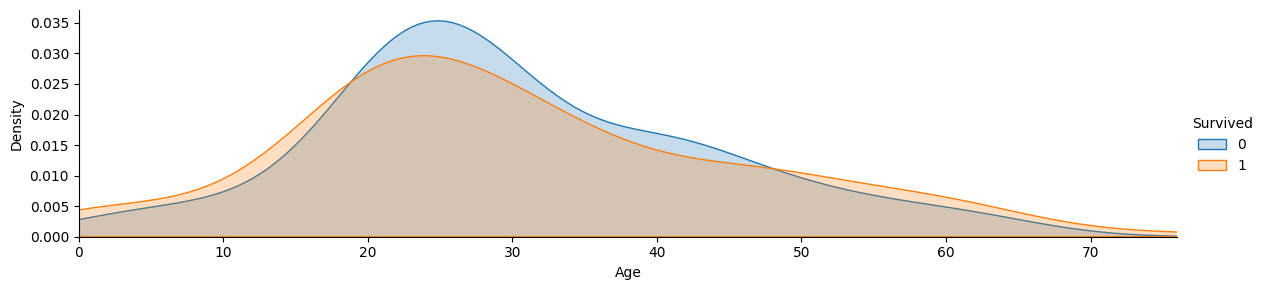

In [ ]:
facet = sns.FacetGrid(Data_tic,hue='Survived',aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, Data_tic['Age'].max()))
facet.add_legend()

In [ ]:
Data_tic.corr()

<ipython-input-71-80a40254981c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data_tic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


In [ ]:
male_ind = len(Data_tic[Data_tic['Sex'] == 'male'])
print("Num of Males in Titanic:",male_ind)

Num of Males in Titanic: 266


In [ ]:
female_ind = len(Data_tic[Data_tic['Sex'] == 'female'])
print("Num of Females in Titanic:",female_ind)

Num of Females in Titanic: 152


In [ ]:

alive = len(Data_tic[Data_tic['Survived'] == 1])
dead = len(Data_tic[Data_tic['Survived'] == 0])

In [ ]:
Data_tic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


import numpy as np
from google.colab import autoviz
df_6404671160571167713 = autoviz.get_registered_df('df_6404671160571167713')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6404671160571167713, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8828425103242961000 = autoviz.get_registered_df('df_8828425103242961000')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8828425103242961000, *['Survived'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5486303114488727456 = autoviz.get_registered_df('df_5486303114488727456')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5486303114488727456, *['Sex'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6404671160571167713 = autoviz.get_registered_df('df_6404671160571167713')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6404671160571167713, *['Survived', 'Sex'], **{'inner': 'stick'})
chart

In [ ]:
Data_tic[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [ ]:
Data_tic[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [ ]:
Data_tic[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.17,1.000000
1,0.33,0.000000
2,0.75,0.000000
3,0.83,0.000000
4,0.92,1.000000
...,...,...
74,62.00,0.000000
75,63.00,0.500000
76,64.00,0.666667
77,67.00,0.000000


In [ ]:
Data_tic[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


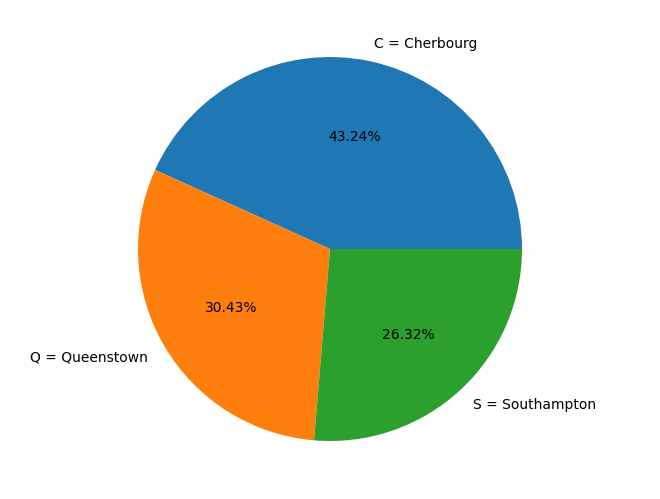

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571,0.389610,0.336957]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [ ]:
Data_tic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,31.500000,NaN,NaN


In [ ]:
#Droping  Columns

In [ ]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

0

In [ ]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

In [ ]:
X['Embarked'] = Data_tic['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

In [ ]:
Data_tic=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']

<Axes: >

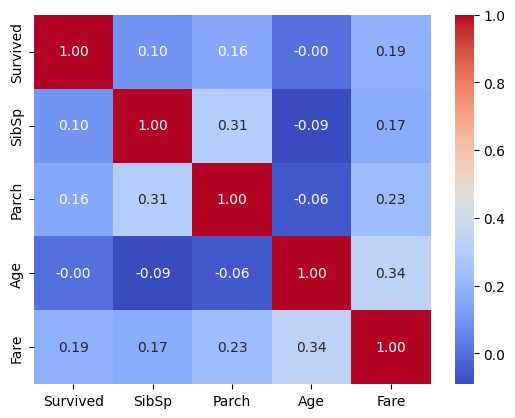

In [ ]:
sns.heatmap(Data_tic[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

<Axes: xlabel='Survived', ylabel='Pclass'>

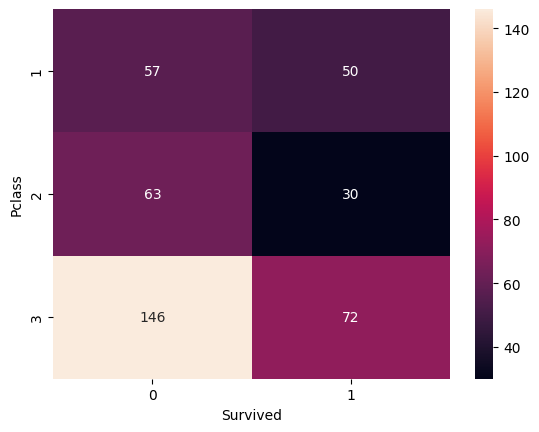

In [4]:
# Group the dataset by Pclass and Survived
group = Data_tic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot = True, fmt ="d")


0    266
1    152
Name: Survived, dtype: int64


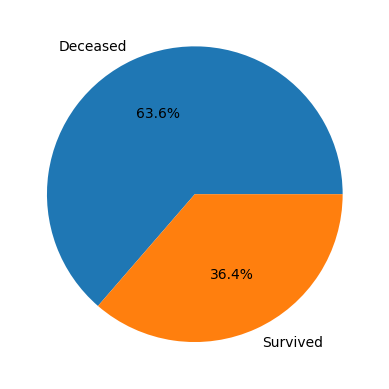

In [5]:

pct_labels = ['Deceased','Survived']
print(Data_tic['Survived'].value_counts())
pct_value = (Data_tic['Survived'].value_counts().values)
plt.pie(pct_value,labels=pct_labels,autopct='%1.1f%%')
plt.show()

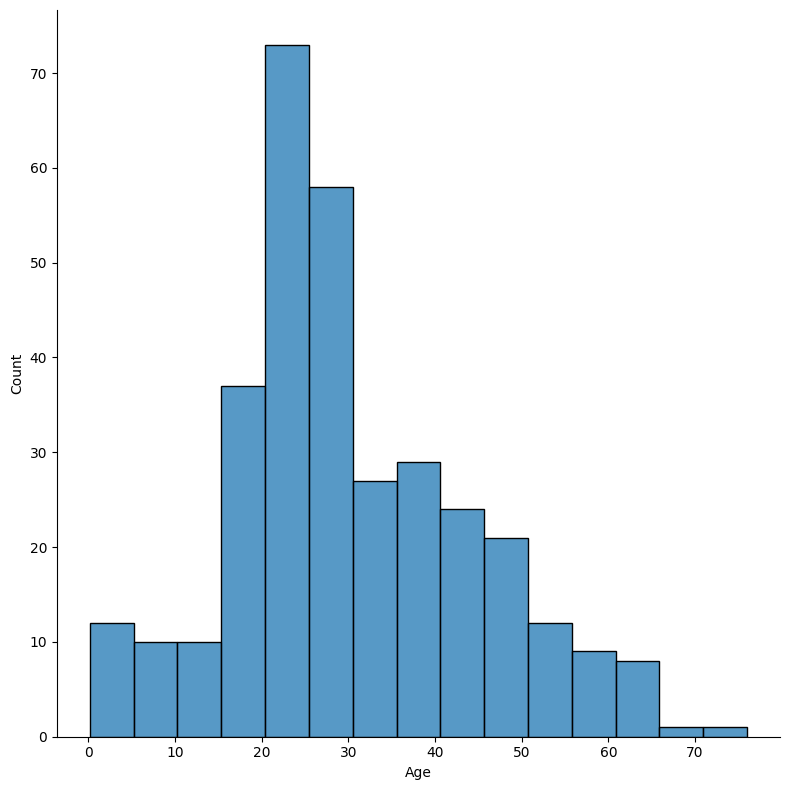

In [6]:
sns.displot(data=Data_tic,x='Age',height=8)

In [7]:
names = Data_tic['Name'].str.split(', ',expand=True)[1]
title = names.str.split('.',expand=True)[0]
title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: 0, dtype: int64

In [8]:
Misc_titles = title.value_counts() < 10
titles = title.apply(lambda x : 'Misc' if Misc_titles[x] == True else x )
Data_tic['titles'] = titles
titles.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: 0, dtype: int64

In [16]:
pd.pivot_table(Data_tic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.272732,27.527877,0.274436,0.379699
1,30.272362,49.747699,0.598684,0.565789


In [17]:
Data_tic.Cabin.value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [22]:
Data_tic["Fare"].fillna(Data_tic.groupby("Pclass")["Fare"].transform("median"), inplace=True)
Data_tic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr


<Axes: >

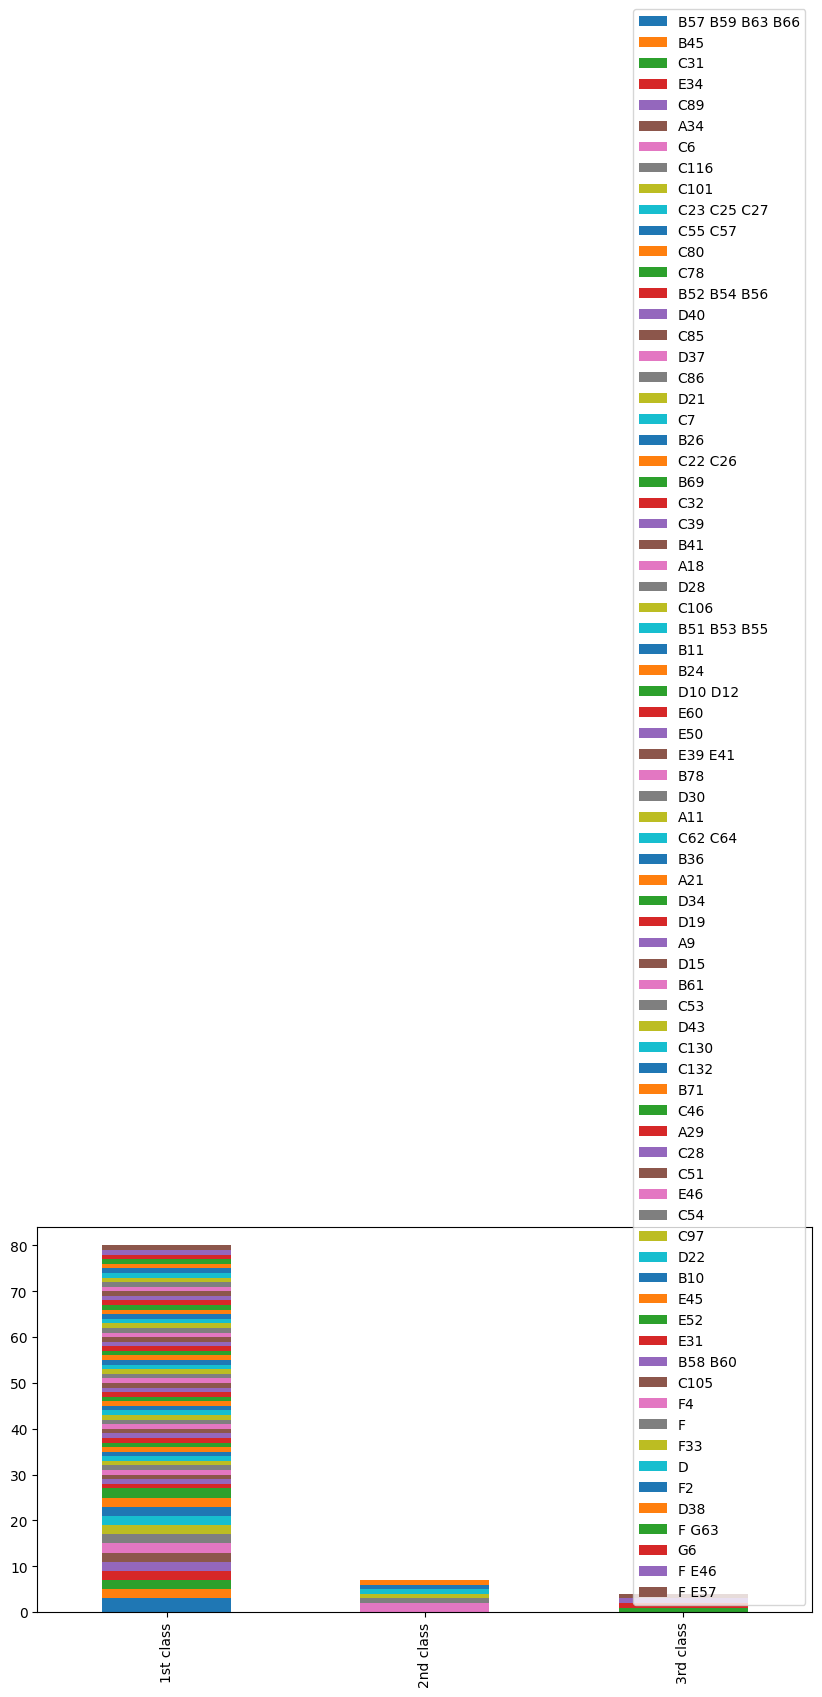

In [26]:
Pclass1 = Data_tic[Data_tic['Pclass']==1]['Cabin'].value_counts()
Pclass2 = Data_tic[Data_tic['Pclass']==2]['Cabin'].value_counts()
Pclass3 = Data_tic[Data_tic['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))